In [49]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [50]:
lat_lng_arr = []
import json
with open('static_stops.json', 'r') as f:
    stop_dict = json.loads(f.read())
    
for i in stop_dict["stops"]:
    lat_lng_arr.append([i["lat"], i["long"]])

stop_df = pd.DataFrame({})
stops_dict = stop_dict['stops']

stops_df = pd.DataFrame(stops_dict)

In [51]:
coords = np.array(lat_lng_arr)
coords

array([[53.35224436, -6.26372322],
       [53.35230855, -6.26381074],
       [53.35257451, -6.26417549],
       ...,
       [53.36527032, -6.51422401],
       [53.32218866, -6.45386079],
       [53.38141798, -6.5773964 ]])

In [52]:
kms_per_radian = 6371.0088
epsilon = 0.8 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


Number of clusters: 38


In [53]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)
print(len(centermost_points))

38


In [54]:
lats, longs = zip(*centermost_points)

rep_points = pd.DataFrame({'lat': lats, 'long': longs})


In [55]:
rs = rep_points.apply(lambda row: stops_df[(stops_df['lat']==row['lat']) & (stops_df['long']==row['long'])].iloc[0], axis=1)


In [56]:
#rs
clusters.to_json('myClusters.json', orient='split', index=False)
with open('myClusters.json', 'r') as f:
    cluster_json = json.loads(f.read())['data']
cluster_json
for i in cluster_json[1]:
    if round(i[0], 7) == round(float(list(np.array(centermost_points))[1][0]), 7):
        print("true")

true


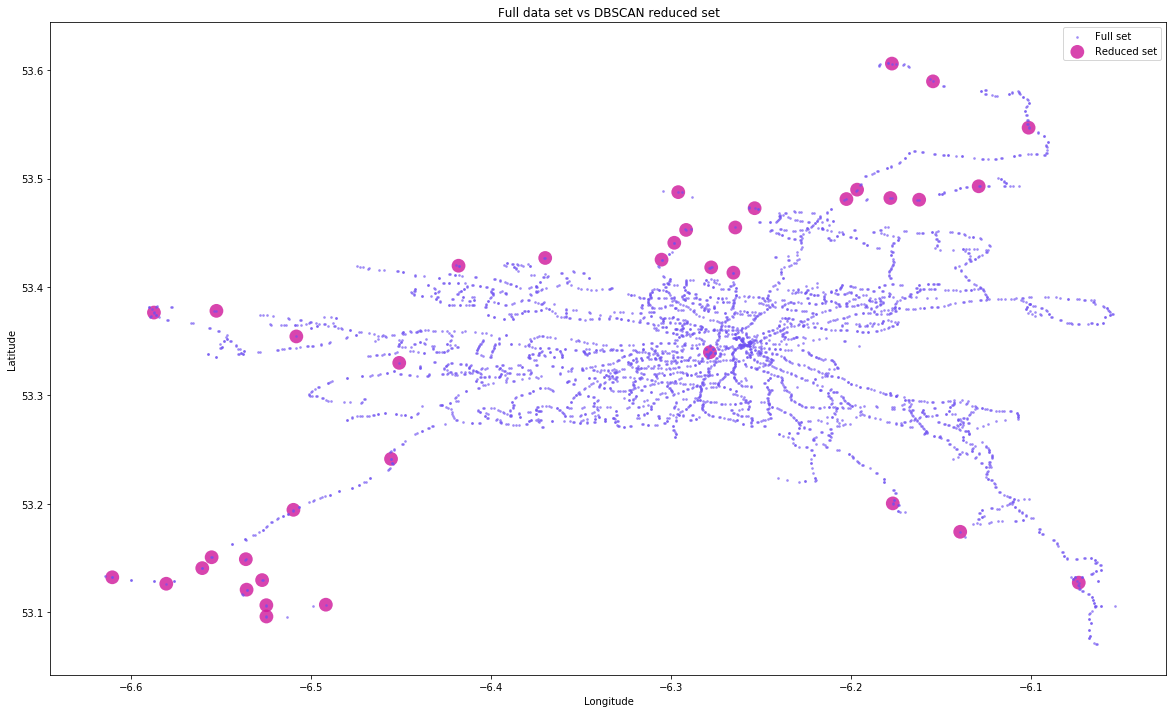

In [67]:
fig, ax = plt.subplots(figsize=[20, 12])
rs_scatter = ax.scatter(rs['long'], rs['lat'], c='#cf179a', edgecolor='None', alpha=0.8, s=190)
df_scatter = ax.scatter(stops_df['long'], stops_df['lat'], c='#6e51F2', alpha=0.5, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.savefig('clusters/cluster_map.png')
plt.show()


In [58]:
## creating backend cluster stop dict
backend_clusterstop_dict = {}

for i in range(len(cluster_json)):
    backend_clusterstop_dict[str(list(np.array(centermost_points))[i])] = cluster_json[i]


In [59]:
backend_clusterstop_dict

{'(53.3398919247649, -6.27841685391787)': [[53.3522443611, -6.2637232189],
  [53.3523085514, -6.2638107422],
  [53.3525745132, -6.264175486],
  [53.3527493357, -6.264453804],
  [53.3528409106, -6.2645702612],
  [53.3532722715, -6.2651836766],
  [53.3533921036, -6.2653891239],
  [53.3568152335, -6.2646791951],
  [53.3571075162, -6.2643818673],
  [53.3585312379, -6.2627765057],
  [53.3602667076, -6.2609780427],
  [53.3663915571, -6.3056141835],
  [53.3630783244, -6.2583992885],
  [53.3658559259, -6.2559568207],
  [53.3672348759, -6.255599941],
  [53.3701011993, -6.254310599],
  [53.3735036097, -6.2528037527],
  [53.3742282801, -6.2562610042],
  [53.3751331589, -6.2603723481],
  [53.3758994661, -6.2636177364],
  [53.37943896, -6.2665852613],
  [53.3815786376, -6.2660022708],
  [53.3834882529, -6.2656691013],
  [53.3703319002, -6.3046011692],
  [53.3860332259, -6.2688580773],
  [53.3861955681, -6.271377201],
  [53.3887179243, -6.2717711412],
  [53.3862067871, -6.2709106925],
  [53.38612685

In [60]:
with open('backend_cluster_dict.json', 'a') as f:
    f.write(json.dumps(backend_clusterstop_dict))

In [61]:
with open('backend_cluster_dict.json', 'r') as f:
    x = json.loads(f.read())

JSONDecodeError: Extra data: line 1 column 135747 (char 135746)

In [ ]:
x

In [62]:
kk = x.keys()

In [63]:
kk

dict_keys(['(53.3398919247649, -6.27841685391787)', '(53.4131980312074, -6.26534792574262)', '(53.4180773132492, -6.27768199427661)', '(53.4252131299953, -6.30527693714688)', '(53.2415808384003, -6.45564439135004)', '(53.3764500204745, -6.58742161236595)', '(53.5468359551958, -6.10126418211316)', '(53.6059096021511, -6.17724386956793)', '(53.4810542918404, -6.20252097464925)', '(53.4804571614848, -6.162089910256)', '(53.4820238422845, -6.17811492190557)', '(53.4928417056355, -6.12901384066871)', '(53.4897192928483, -6.19659340462066)', '(53.5895431023562, -6.15441273347693)', '(53.4726344563081, -6.25355434286806)', '(53.4874392618613, -6.29600046386784)', '(53.3780202649437, -6.55269430118181)', '(53.3544467335227, -6.50827613102709)', '(53.1946441277618, -6.50989409281582)', '(53.2005725802356, -6.17676804873092)', '(53.127503780347, -6.07338817760949)', '(53.452620398586, -6.29161283700521)', '(53.1743757146269, -6.13928227932353)', '(53.4196069304, -6.4181160960463)', '(53.44075172

In [64]:
from ast import literal_eval
for i in kk:
    print(literal_eval(i))

(53.3398919247649, -6.27841685391787)
(53.4131980312074, -6.26534792574262)
(53.4180773132492, -6.27768199427661)
(53.4252131299953, -6.30527693714688)
(53.2415808384003, -6.45564439135004)
(53.3764500204745, -6.58742161236595)
(53.5468359551958, -6.10126418211316)
(53.6059096021511, -6.17724386956793)
(53.4810542918404, -6.20252097464925)
(53.4804571614848, -6.162089910256)
(53.4820238422845, -6.17811492190557)
(53.4928417056355, -6.12901384066871)
(53.4897192928483, -6.19659340462066)
(53.5895431023562, -6.15441273347693)
(53.4726344563081, -6.25355434286806)
(53.4874392618613, -6.29600046386784)
(53.3780202649437, -6.55269430118181)
(53.3544467335227, -6.50827613102709)
(53.1946441277618, -6.50989409281582)
(53.2005725802356, -6.17676804873092)
(53.127503780347, -6.07338817760949)
(53.452620398586, -6.29161283700521)
(53.1743757146269, -6.13928227932353)
(53.4196069304, -6.4181160960463)
(53.440751727711, -6.29821574960963)
(53.1408899059885, -6.56057429403245)
(53.3300889307077, -6